In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn import model_selection

#load mnist datasets
mnist = datasets.fetch_mldata("MNIST original", data_home=".")

In [10]:
#input data & label preprocessing
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(mnist.data, mnist.target, test_size = 1/7)

"""img = X_train[1].reshape(28,28)
plt.title(int(y_train[1]))
plt.imshow(img, cmap="gray")
plt.show()"""

X_train = X_train / 255.
X_test = X_test/ 255.

b_train = np.ones((len(X_train), 1))
b_test = np.ones((len(X_test), 1))
X_train = np.append(X_train, b_train, axis = 1)
X_test = np.append(X_test, b_test, axis = 1)

Y_train = [[0 if i != y_train[j] else 1 for i in range(10)] for j in range(len(y_train))]
Y_test = [[0 if i != y_test[j] else 1 for i in range(10)] for j in range(len(y_test))]

In [13]:
#weight init
weight = np.ones((10, 28*28+1))

#define learning rate
lr = 0.001

#define mu for momentum
mu = 0.8

#define alpha, g for RMSProp
alpha = 0.9
g = np.zeros((10, 28*28+1))

#define epoch
epoch = 20

#define batch size
batch_size = 200

In [4]:
#output layer
def myOutputLayer(unit_no, input_data):
    z = []

    for i in range(unit_no):
        z.append(0)
        for j in range(len(input_data)):
            z[i] += input_data[j] * weight[i][j]

    #activation
    y = mySoftmax(unit_no, z)

    return y

#activation function - softmax function
def mySoftmax(unit_no, input_data):
    e = np.e
    y = []
    for i in range(unit_no):
        s = 0
        for j in range(unit_no):
            s += e ** (input_data[j] - max(input_data))
        y.append((e ** (input_data[i] - max(input_data))) / s)

    return y

In [5]:
#calculate accuracy
def myCalcAcc(est, label_data):
    est = np.array(est)
    label_data = np.array(label_data)
    
    a = np.argmax(est, axis=1) - np.argmax(label_data, axis=1)
    acc = np.sum(a == 0)
    acc = acc / label_data.shape[0]
    
    return acc

In [6]:
#loss function - Cross Entropy
def myCrossEntropy(est, t):
    E = 0
    for i in range(len(t)):
        Ei = 0
        for j in range(len(t[0])):
            Ei -= t[i][j] * np.log(est[i][j])
        E += Ei
    
    return E

In [7]:
#calculate ΔE
def myCalcDE(input_data, label_data, est):
    est = np.array(est)
    label_data = np.array(label_data)

    #calc ΔE
    DE = np.empty((0, (28 * 28) + 1))
    Er = est - label_data
    for x in range(len(label_data[0])):
        nw = np.array([np.dot(Er[:,x], input_data)])
        DE = np.append(DE, nw, axis=0)

    return DE

In [8]:
#RMSprop
def myWeightUpdate_RMSProp(DE):
    for i in range(len(DE)):
        g[i] = (alpha * g[i]) + (1 - alpha) * (DE[i] ** 2)
        weight[i] -= (lr / (np.sqrt(g[i]) + 1e-8)) * DE[i]

In [9]:
#Get Mini Batch
def myGetBatch(X, Y, size):
    Y = np.array(Y)
    rnd_index = np.arange(X.shape[0])
    np.random.shuffle(rnd_index)
    X_shuf = X[rnd_index, :]
    Y_shuf = Y[rnd_index, :]
    
    for i in range(0, X.shape[0], size):
        X_batch = X_shuf[i : i + size]
        Y_batch = Y_shuf[i : i + size]
        
        yield X_batch, Y_batch

epoch = 1/20
train_acc = 0.8536666666666664
train_loss = 0.6773213905413787
test_acc = 0.8937
test_loss = 0.38974443310820583
epoch = 2/20
train_acc = 0.905783333333333
train_loss = 0.34620272632449806
test_acc = 0.9081
test_loss = 0.329877157830613
epoch = 3/20
train_acc = 0.9147166666666667
train_loss = 0.3089353768071211
test_acc = 0.9127
test_loss = 0.3107823314845975
epoch = 4/20
train_acc = 0.9191333333333336
train_loss = 0.292393597811098
test_acc = 0.9179
test_loss = 0.30082693546550526
epoch = 5/20
train_acc = 0.9215999999999999
train_loss = 0.2827434714187506
test_acc = 0.9185
test_loss = 0.29659942997448085
epoch = 6/20
train_acc = 0.9234000000000006
train_loss = 0.27593572410674017
test_acc = 0.9215
test_loss = 0.2915038585224423
epoch = 7/20
train_acc = 0.9245333333333335
train_loss = 0.2711852350043607
test_acc = 0.9215
test_loss = 0.28828538730585146
epoch = 8/20
train_acc = 0.9254500000000008
train_loss = 0.26740106085863763
test_acc = 0.9238
test_loss = 0.2854141283313

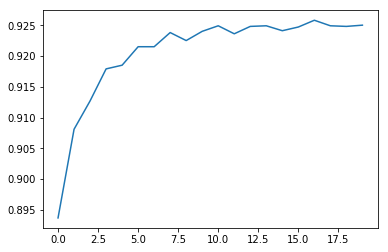

In [14]:
#main
test_acc_list = []
test_loss_list = []

for ep in range(epoch):
    train_acc = 0
    train_E = 0
    
    #training
    for X_batch, Y_batch in myGetBatch(X_train, Y_train, batch_size):
        est = []
        for i in X_batch:
            est.append(myOutputLayer(10, i))
        train_acc += myCalcAcc(est, Y_batch)
            
        train_E += myCrossEntropy(est, Y_batch)
    
        DE = myCalcDE(X_batch, Y_batch, est)
        
        myWeightUpdate_RMSProp(DE)
        
    train_acc = train_acc / (X_train.shape[0] / batch_size)
    train_E = train_E / X_train.shape[0]
    
    #testing
    test_est = []
    for i in X_test:
        test_est.append(myOutputLayer(10, i))
    test_acc = myCalcAcc(test_est, Y_test)
    test_acc_list.append(test_acc)
    
    test_E = myCrossEntropy(test_est, Y_test) / X_test.shape[0]
    test_loss_list.append(test_E)
        
    print("epoch = " + str(ep + 1) + "/" + str(epoch))
    print("train_acc = " + str(train_acc))
    print("train_loss = " + str(train_E))
    print("test_acc = " + str(test_acc))
    print("test_loss = " + str(test_E))
    
plt.plot(range(epoch), test_acc_list)
plt.show()